# MY DATA ANALYSIS PROJECT ON AVOCADO PRICES : Historical Data On Avocado Prices and Sales in US Markets. 

LIBRARIES TO IMPORT

In [1]:
#!conda install -c conda-forge folium=0.5.0 --yes
#conda install -c conda-forge fbprophet

In [2]:
import pandas as pd #Package for data analysis
import numpy as np  #Package for scientific computation , matrices and vectors
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import folium

CREATING DATA FRAME FROM AVAILABLE DATA

In [3]:
df=pd.read_csv("avocado.csv")



In [4]:
df1=pd.read_csv("avocado.csv")

In [5]:
df1.drop(['Unnamed: 0'],axis=1,inplace=True)
df1.rename(columns={"Total Volume":"Total Volume Sold","4046":"PLU_4046","4225":"PLU_4225","4770":"PLU_4770"},inplace=True)

In [6]:
df1['Year'], df1['Month'],  df1['Day'] = df1['Date'].str.split('-').str

In [7]:
df1.head(3)

,Date,AveragePrice,Total Volume Sold,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12,13


In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)



NOW WE NEED TO RENAME THE COLUMNS TO MAKE THEM MORE CLEAR TO UNDERSTAND

In [9]:
df.rename(columns={"Total Volume":"Total Volume Sold","4046":"PLU_4046","4225":"PLU_4225","4770":"PLU_4770"},inplace=True)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

Checking the dtypes of columns to make their approprate use

In [11]:
df.head()

,Date,AveragePrice,Total Volume Sold,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
df.shape

(18249, 13)

In [13]:
df.dtypes

Date                 datetime64[ns]
AveragePrice                float64
Total Volume Sold           float64
PLU_4046                    float64
PLU_4225                    float64
PLU_4770                    float64
Total Bags                  float64
Small Bags                  float64
Large Bags                  float64
XLarge Bags                 float64
type                         object
year                          int64
region                       object
dtype: object

In [14]:
corr=df[['AveragePrice','Total Volume Sold','PLU_4046','PLU_4770','PLU_4225','Total Bags','Small Bags','Large Bags','XLarge Bags']].corr(method='pearson')

In [15]:
corr

,AveragePrice,Total Volume Sold,PLU_4046,PLU_4770,PLU_4225,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.192752,-0.208317,-0.179446,-0.172928,-0.177088,-0.174730,-0.172940,-0.117592
Total Volume Sold,-0.192752,1.000000,0.977863,0.872202,0.974181,0.963047,0.967238,0.880640,0.747157
PLU_4046,-0.208317,0.977863,1.000000,0.833389,0.926110,0.920057,0.925280,0.838645,0.699377
PLU_4770,-0.179446,0.872202,0.833389,1.000000,0.887855,0.792314,0.802733,0.698471,0.679861
PLU_4225,-0.172928,0.974181,0.926110,0.887855,1.000000,0.905787,0.916031,0.810015,0.688809
Total Bags,-0.177088,0.963047,0.920057,0.792314,0.905787,1.000000,0.994335,0.943009,0.804233
Small Bags,-0.174730,0.967238,0.925280,0.802733,0.916031,0.994335,1.000000,0.902589,0.806845
Large Bags,-0.172940,0.880640,0.838645,0.698471,0.810015,0.943009,0.902589,1.000000,0.710858
XLarge Bags,-0.117592,0.747157,0.699377,0.679861,0.688809,0.804233,0.806845,0.710858,1.000000


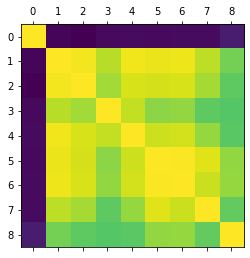

In [16]:
plt.matshow(corr)

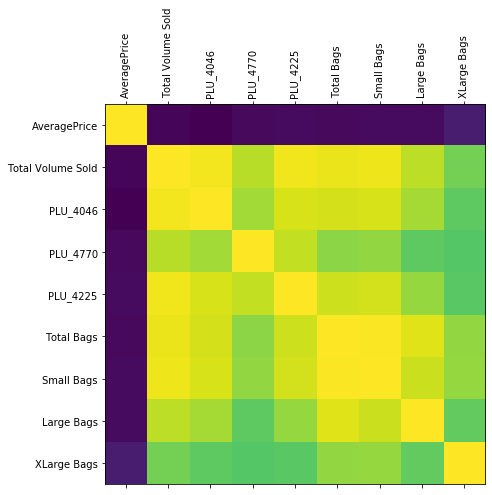

In [17]:
labels=[c[:] for c in corr.columns]
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(111)

ax.matshow(corr)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
plt.xticks(rotation=90)

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()


Creating a new dataframe with approprate attributes so can can do a stastical analysis.

In [18]:
print(df.shape)


(18249, 13)


In [19]:
dfc=df['type'].value_counts().to_frame()
dfc.rename(columns={"type":"Count"},inplace=True)
dfc.index.name="Type"
dfc

,Count
Type,
conventional,9126
organic,9123


We can clearly see that we have two type of avocados and there count throught the dataset.

In [20]:
df_group_one=df[['region','type','AveragePrice','Date']]
df_group_one.head()

,region,type,AveragePrice,Date
0,Albany,conventional,1.33,2015-12-27
1,Albany,conventional,1.35,2015-12-20
2,Albany,conventional,0.93,2015-12-13
3,Albany,conventional,1.08,2015-12-06
4,Albany,conventional,1.28,2015-11-29


In [21]:
df_group_one.shape

(18249, 4)

In [22]:
df_group_one.dtypes

region                  object
type                    object
AveragePrice           float64
Date            datetime64[ns]
dtype: object

In [23]:
df_group1 = df_group_one.groupby(['region','type'],as_index=False).mean()
df_group1[['region']]=df_group1[['region']].astype('str')
df_group1.rename(columns={'AveragePrice':'Mean_Average_Price'},inplace=True)
df_group1.head(10)

,region,type,Mean_Average_Price
0,Albany,conventional,1.348757
1,Albany,organic,1.773314
2,Atlanta,conventional,1.068817
3,Atlanta,organic,1.607101
4,BaltimoreWashington,conventional,1.344201
5,BaltimoreWashington,organic,1.724260
6,Boise,conventional,1.076036
7,Boise,organic,1.620237
8,Boston,conventional,1.304379
9,Boston,organic,1.757396


In [24]:
grouped_df=df_group1.pivot(index="region",columns='type')
grouped_df.head(11)

Mean_Average_Price          
type                      conventional   organic
region                                          
Albany                        1.348757  1.773314
Atlanta                       1.068817  1.607101
BaltimoreWashington           1.344201  1.724260
Boise                         1.076036  1.620237
Boston                        1.304379  1.757396
BuffaloRochester              1.382308  1.651361
California                    1.105444  1.685207
Charlotte                     1.275089  1.936982
Chicago                       1.369349  1.744201
CincinnatiDayton              1.015503  1.402899
Columbus                      1.066272  1.439290

### Region And Type vs Mean_Average_Price

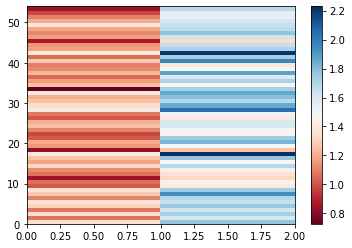

In [25]:
#use the grouped results
plt.pcolor(grouped_df,cmap='RdBu')
plt.colorbar()
plt.show()

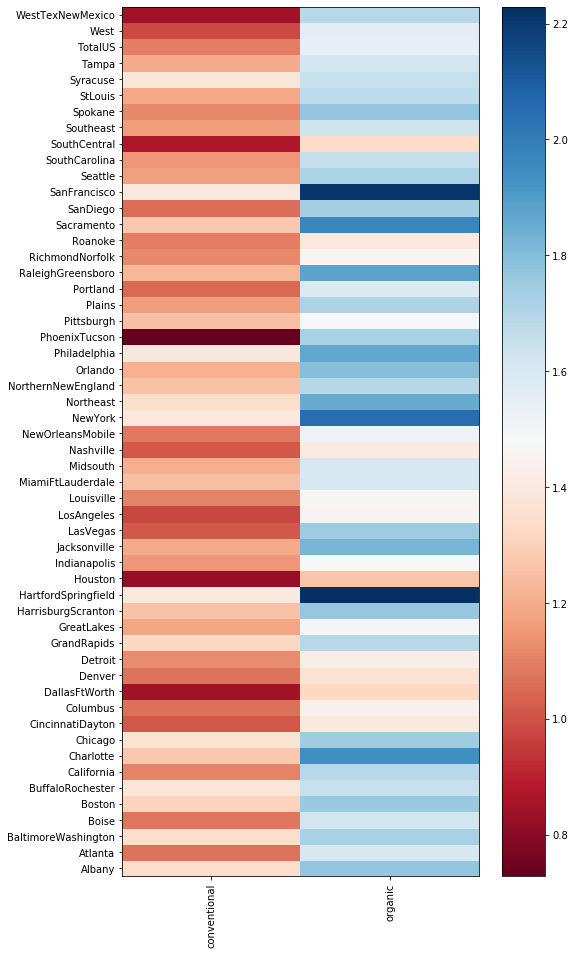

In [26]:
fig , ax =plt.subplots(figsize=(8,16))
im=ax.pcolor(grouped_df,cmap='RdBu')
#label names
row_labels = grouped_df.columns.levels[1]  # For X Axis 
col_labels = grouped_df.index              # For Y Axis

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_df.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_df.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)
fig.colorbar(im)
plt.show()

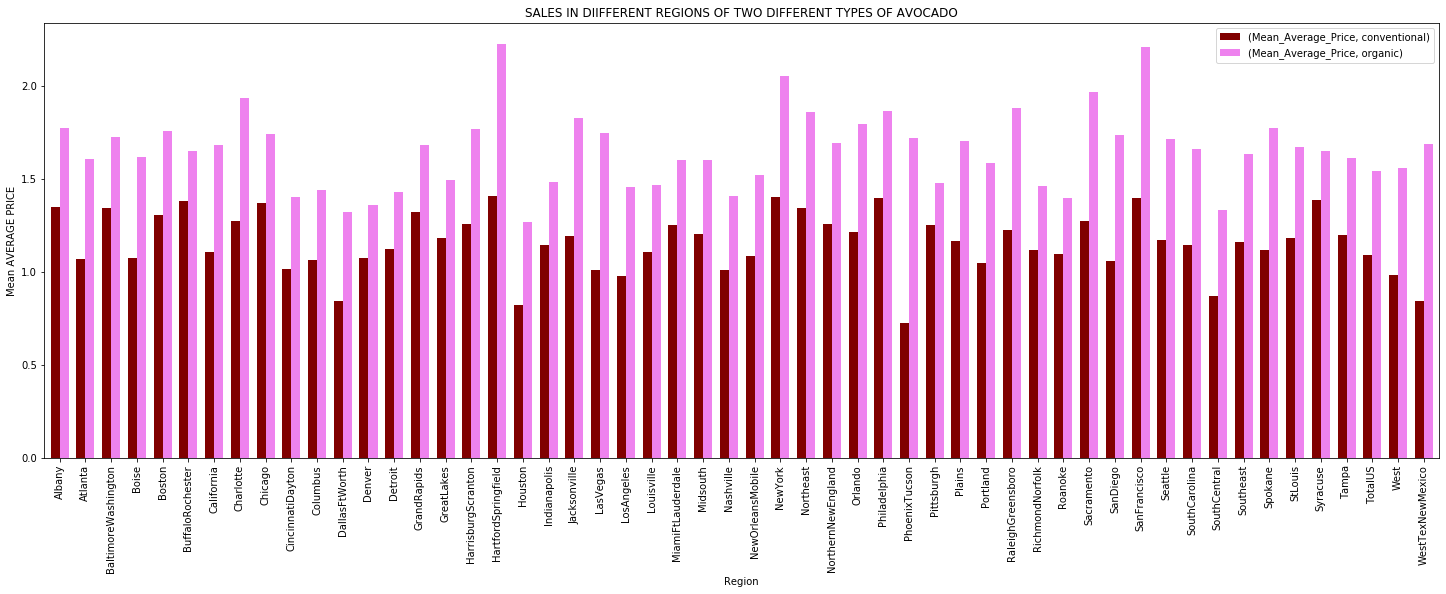

In [27]:
grouped_df.plot(kind='bar',width=0.7,figsize=(25,8),color=("maroon","violet"))
plt.xlabel('Region') # add to x-label to the plot
plt.ylabel('Mean AVERAGE PRICE') # add y-label to the plot
plt.title('SALES IN DIIFFERENT REGIONS OF TWO DIFFERENT TYPES OF AVOCADO') # add title to the plot
plt.legend()
plt.show()

Above are the mean average prices of conventional and organic avocado in different regions of united states from the dates 2015-01-01 to 2018-03-25 

In [28]:
groupeddf_stat=grouped_df.describe()
groupeddf_stat

Mean_Average_Price           
type        conventional    organic
count          54.000000  54.000000
mean            1.158040   1.654010
std             0.162290   0.205752
min             0.728225   1.270769
25%             1.070104   1.486154
50%             1.164260   1.657041
75%             1.270533   1.755266
max             1.408047   2.229231

In [29]:
df_group1[df_group1['Mean_Average_Price']==df_group1['Mean_Average_Price'].max()]

,region,type,Mean_Average_Price
35,HartfordSpringfield,organic,2.229231


In [30]:
dd1=df_group1[df_group1['type']=='conventional']
#dd1
dd1[dd1['Mean_Average_Price']==dd1['Mean_Average_Price'].max()]

,region,type,Mean_Average_Price
34,HartfordSpringfield,conventional,1.408047


In [31]:
df_group1[df_group1['Mean_Average_Price']==df_group1['Mean_Average_Price'].min()]

,region,type,Mean_Average_Price
66,PhoenixTucson,conventional,0.728225


In [32]:
dd2=df_group1[df_group1['type']=='organic']
dd2[dd2['Mean_Average_Price']==dd2['Mean_Average_Price'].min()]
#dd2

,region,type,Mean_Average_Price
37,Houston,organic,1.270769


From the  above analysis we have found that 
 - The minimum mean average price for an organic type of avocado (between dates : 2015-01-01 to 2018-03-25 available in our dataset) is 1.270769 in the region Houston
        
 - The maximum mean average price for an organic type of avocado (between dates : 2015-01-01 to 2018-03-25 available in our dataset) is 2.229231 in the region Hartford Springfield
       
 - The minimum mean average price for a conventional type of avocado (between dates : 2015-01-01 to 2018-03-25 available in our dataset) is 0.728225 in the region Phoenix Tucson
     
 - The maximum mean average price for a conventional type of avocado (between dates : 2015-01-01 to 2018-03-25 available in our dataset) is 1.408047  in the region Hartford Springfield
 
 

NOW from the above analysis its clear that HartfordSpringfield has highest mean average price for any kind of avocado .
So lets analyze the data for HartfordSpringfield

In [33]:
hs_latitude=41.9414
hs_longitude=-72.6997
hs_map = folium.Map(location=[hs_latitude, hs_longitude],tiles='Stamen Terrain')
hs_map

This is the location of Hartford Springfield 

In [34]:
HarSpri_df=df[df["region"]=="HartfordSpringfield"]
HarSpri_df.drop(['Total Volume Sold','PLU_4225','PLU_4046','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year'],axis=1,inplace=True)
HarSpri_df.head()

C:\ANACONDA\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Date,AveragePrice,type,region
884,2015-12-27,1.27,conventional,HartfordSpringfield
885,2015-12-20,1.18,conventional,HartfordSpringfield
886,2015-12-13,1.24,conventional,HartfordSpringfield
887,2015-12-06,1.19,conventional,HartfordSpringfield
888,2015-11-29,1.32,conventional,HartfordSpringfield


In [35]:
HarSpri_df.dtypes

Date            datetime64[ns]
AveragePrice           float64
type                    object
region                  object
dtype: object

In [36]:
HarSpri_cov=HarSpri_df[HarSpri_df['type']=='conventional']
HarSpri_cov.dtypes

Date            datetime64[ns]
AveragePrice           float64
type                    object
region                  object
dtype: object

In [37]:
HarSpri_cov.sort_values(by='Date',inplace=True)
HarSpri_cov.head()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,AveragePrice,type,region
935,2015-01-04,1.06,conventional,HartfordSpringfield
934,2015-01-11,1.38,conventional,HartfordSpringfield
933,2015-01-18,1.39,conventional,HartfordSpringfield
932,2015-01-25,1.35,conventional,HartfordSpringfield
931,2015-02-01,1.32,conventional,HartfordSpringfield


In [38]:
HarSpri_cov[HarSpri_cov['AveragePrice']==HarSpri_cov['AveragePrice'].max()]

,Date,AveragePrice,type,region
6548,2017-05-28,1.85,conventional,HartfordSpringfield


In [39]:
HarSpri_cov[HarSpri_cov['AveragePrice']==HarSpri_cov['AveragePrice'].min()]

,Date,AveragePrice,type,region
3725,2016-05-08,0.86,conventional,HartfordSpringfield


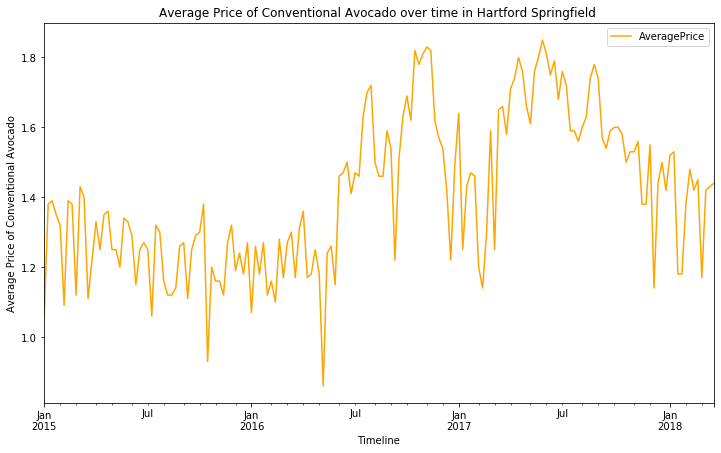

In [40]:
HarSpri_cov.plot(x='Date', y='AveragePrice',figsize=(12,7),color='orange')
plt.xlabel("Timeline")
plt.ylabel("Average Price of Conventional Avocado")
plt.title("Average Price of Conventional Avocado over time in Hartford Springfield ")
plt.legend()

In [41]:
HarSpri_org=HarSpri_df[HarSpri_df['type']=='organic']
HarSpri_org.dtypes

Date            datetime64[ns]
AveragePrice           float64
type                    object
region                  object
dtype: object

In [42]:
HarSpri_org.sort_values(by=['Date'],inplace=True)
HarSpri_org.head()


C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,AveragePrice,type,region
10061,2015-01-04,2.32,organic,HartfordSpringfield
10060,2015-01-11,2.28,organic,HartfordSpringfield
10059,2015-01-18,2.35,organic,HartfordSpringfield
10058,2015-01-25,2.21,organic,HartfordSpringfield
10057,2015-02-01,1.54,organic,HartfordSpringfield


In [43]:
HarSpri_org[HarSpri_org['AveragePrice']==HarSpri_org['AveragePrice'].min()]

,Date,AveragePrice,type,region
17810,2018-02-18,1.48,organic,HartfordSpringfield


In [44]:
HarSpri_org[HarSpri_org['AveragePrice']==HarSpri_org['AveragePrice'].max()]

,Date,AveragePrice,type,region
12823,2016-11-13,2.68,organic,HartfordSpringfield


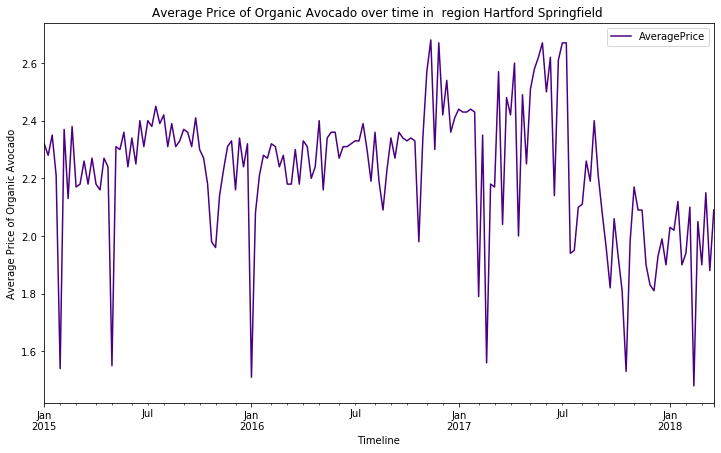

In [45]:
HarSpri_org.plot(x='Date',y='AveragePrice',figsize=(12,7),color='indigo')
plt.xlabel("Timeline")
plt.ylabel("Average Price of Organic Avocado")
plt.title("Average Price of Organic Avocado over time in  region Hartford Springfield ")
plt.legend()

In [46]:
HarSpri_mark=df[df["region"]=="HartfordSpringfield"]
HarSpri_mark.drop(['PLU_4225','AveragePrice','PLU_4046','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year'],axis=1,inplace=True)
HarSpri_mark.head()

C:\ANACONDA\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Date,Total Volume Sold,type,region
884,2015-12-27,243556.57,conventional,HartfordSpringfield
885,2015-12-20,264155.74,conventional,HartfordSpringfield
886,2015-12-13,238558.16,conventional,HartfordSpringfield
887,2015-12-06,239945.42,conventional,HartfordSpringfield
888,2015-11-29,213631.54,conventional,HartfordSpringfield


In [47]:
HarSpri_mark1=HarSpri_mark[HarSpri_mark['type']=='organic']
HarSpri_mark1.sort_values(by=['Date'],inplace=True)
HarSpri_mark1.head()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Total Volume Sold,type,region
10061,2015-01-04,4801.10,organic,HartfordSpringfield
10060,2015-01-11,3463.61,organic,HartfordSpringfield
10059,2015-01-18,2552.09,organic,HartfordSpringfield
10058,2015-01-25,1920.19,organic,HartfordSpringfield
10057,2015-02-01,6084.48,organic,HartfordSpringfield


In [48]:
HarSpri_mark1[HarSpri_mark1['Total Volume Sold']==HarSpri_mark1['Total Volume Sold'].max()]

,Date,Total Volume Sold,type,region
17810,2018-02-18,49348.86,organic,HartfordSpringfield


In [49]:
HarSpri_mark1[HarSpri_mark1['Total Volume Sold']==HarSpri_mark1['Total Volume Sold'].min()]

,Date,Total Volume Sold,type,region
12826,2016-10-23,1494.63,organic,HartfordSpringfield


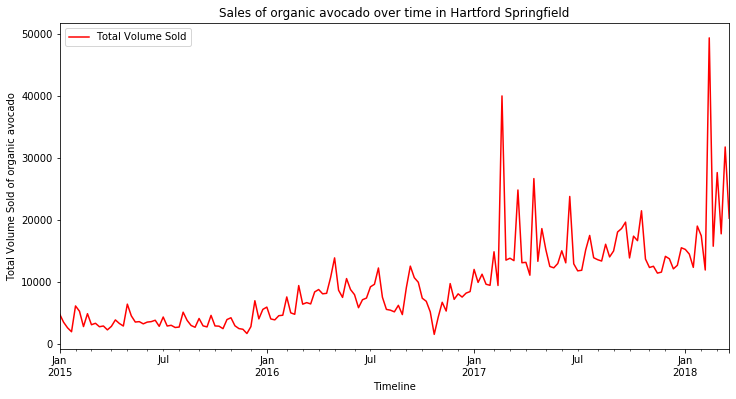

In [50]:
HarSpri_mark1.plot(x='Date',y='Total Volume Sold',figsize=(12,6),color='red')
plt.xlabel("Timeline")
plt.ylabel("Total Volume Sold of organic avocado")
plt.title("Sales of organic avocado over time in Hartford Springfield")
plt.legend()

In [51]:
HarSpri_mark2=HarSpri_mark[HarSpri_mark['type']=='conventional']
HarSpri_mark2.sort_values(by='Date',inplace=True)
HarSpri_mark2.head()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Total Volume Sold,type,region
935,2015-01-04,332208.14,conventional,HartfordSpringfield
934,2015-01-11,232640.15,conventional,HartfordSpringfield
933,2015-01-18,229216.05,conventional,HartfordSpringfield
932,2015-01-25,241174.11,conventional,HartfordSpringfield
931,2015-02-01,297969.31,conventional,HartfordSpringfield


In [52]:
HarSpri_mark2[HarSpri_mark2['Total Volume Sold']==HarSpri_mark2['Total Volume Sold'].max()]

,Date,Total Volume Sold,type,region
3725,2016-05-08,522565.33,conventional,HartfordSpringfield


In [53]:
HarSpri_mark2[HarSpri_mark2['Total Volume Sold']==HarSpri_mark2['Total Volume Sold'].min()]

,Date,Total Volume Sold,type,region
3699,2016-11-06,173620.97,conventional,HartfordSpringfield


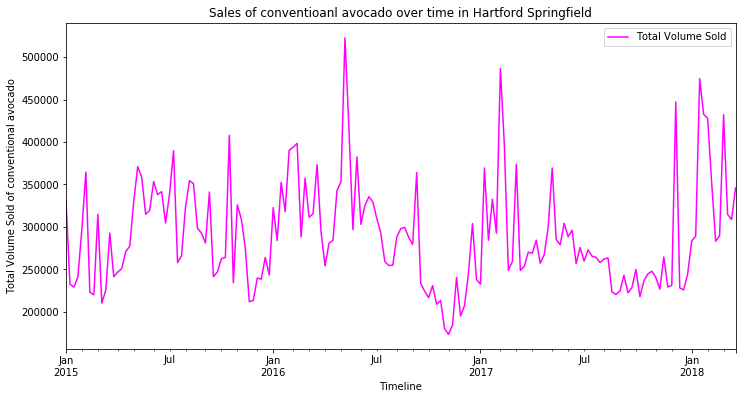

In [54]:
HarSpri_mark2.plot(x='Date',y='Total Volume Sold',figsize=(12,6),color='magenta')
plt.xlabel("Timeline")
plt.ylabel("Total Volume Sold of conventional avocado")
plt.title("Sales of conventioanl avocado over time in Hartford Springfield")
plt.legend()

In [55]:
HarSpri_ana=df[df["region"]=="HartfordSpringfield"]
HarSpri_ana.drop(['PLU_4225','PLU_4046','PLU_4770','Total Bags','year'],axis=1,inplace=True)
#HarSpri_ana.set_index('Date',inplace=True)
#HarSpri_ana.sort_index(inplace=True)
HarSpri_ana.head()

C:\ANACONDA\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Date,AveragePrice,Total Volume Sold,Small Bags,Large Bags,XLarge Bags,type,region
884,2015-12-27,1.27,243556.57,43577.26,944.14,0.0,conventional,HartfordSpringfield
885,2015-12-20,1.18,264155.74,45981.69,977.00,0.0,conventional,HartfordSpringfield
886,2015-12-13,1.24,238558.16,46493.47,741.57,0.0,conventional,HartfordSpringfield
887,2015-12-06,1.19,239945.42,35448.13,639.77,0.0,conventional,HartfordSpringfield
888,2015-11-29,1.32,213631.54,36423.45,675.88,0.0,conventional,HartfordSpringfield


In [56]:
HarSpri_ana1=HarSpri_ana.drop(['type','region','Date'],axis=1)

In [57]:
HarSpri_ana1.sort_values(['AveragePrice'],inplace=True)
HarSpri_ana1.head()

,AveragePrice,Total Volume Sold,Small Bags,Large Bags,XLarge Bags
3725,0.86,522565.33,64704.02,1765.97,0.0
894,0.93,407866.27,42004.56,3104.22,0.0
935,1.06,332208.14,55401.31,2660.26,0.0
908,1.06,389782.20,71429.27,2181.76,0.0
3743,1.07,322752.02,41477.93,1096.75,0.0


Text(0.5, 1.0, 'Average Price vs Total Volume Sold in Hartford Springfield')

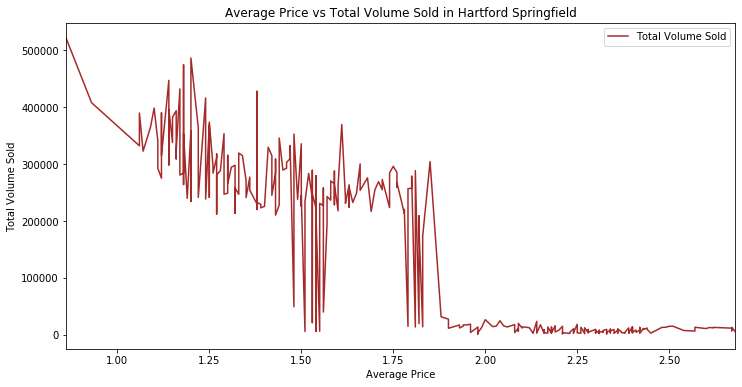

In [58]:
HarSpri_ana1.plot(x='AveragePrice',y='Total Volume Sold',kind='line',figsize=(12,6),color='brown')
plt.xlabel('Average Price')
plt.ylabel('Total Volume Sold')
plt.title('Average Price vs Total Volume Sold in Hartford Springfield')

In [59]:
pearson_coef1 , p_value1 = stats.pearsonr(HarSpri_ana['AveragePrice'],HarSpri_ana['Total Volume Sold'])
print("The Pearson Correlation coefficient is",pearson_coef1," with a p-value of P : ",p_value1)

The Pearson Correlation coefficient is -0.8997084706270531  with a p-value of P :  5.198133170926543e-123


Since the p-value is  <  0.001, the correlation between Average Price and Total Volume Sold is statistically significant,the coefficient of -0.899 shows that the relationship is negative and moderately strong.

In [60]:
df1.head()

,Date,AveragePrice,Total Volume Sold,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12,06
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11,29


In [61]:
HarSpri_anaa=df1[df1["region"]=="HartfordSpringfield"]
HarSpri_anaa.drop(['PLU_4225','PLU_4046','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)
HarSpri_anaa.sort_values(by=['Date'],inplace=True)
HarSpri_anaa.head()

C:\ANACONDA\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,AveragePrice,Total Volume Sold,type,year,region,Year,Month,Day
935,2015-01-04,1.06,332208.14,conventional,2015,HartfordSpringfield,2015,01,04
10061,2015-01-04,2.32,4801.10,organic,2015,HartfordSpringfield,2015,01,04
934,2015-01-11,1.38,232640.15,conventional,2015,HartfordSpringfield,2015,01,11
10060,2015-01-11,2.28,3463.61,organic,2015,HartfordSpringfield,2015,01,11
933,2015-01-18,1.39,229216.05,conventional,2015,HartfordSpringfield,2015,01,18


In [62]:
#HarSpri_anaa['Month'] = HarSpri_anaa['Month'].replace({'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', 
 #                                 '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', 
  #                                 '11': 'Nov', '12': 'Dec'})

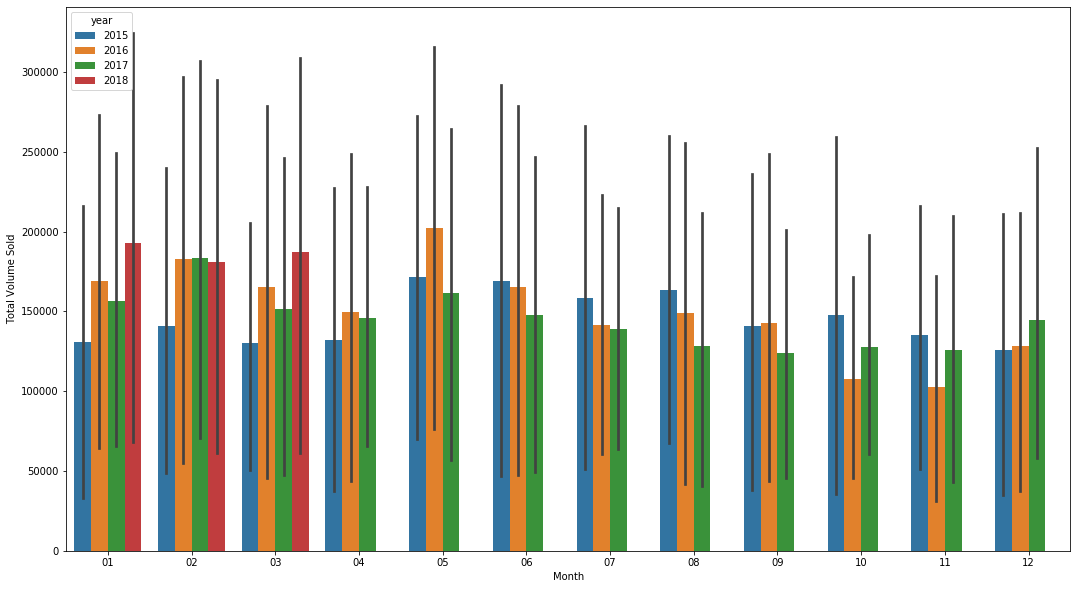

In [63]:
plt.figure(figsize=(18,10))
sns.barplot(x="Month", y="Total Volume Sold", hue='year',  data=HarSpri_anaa)
plt.show()

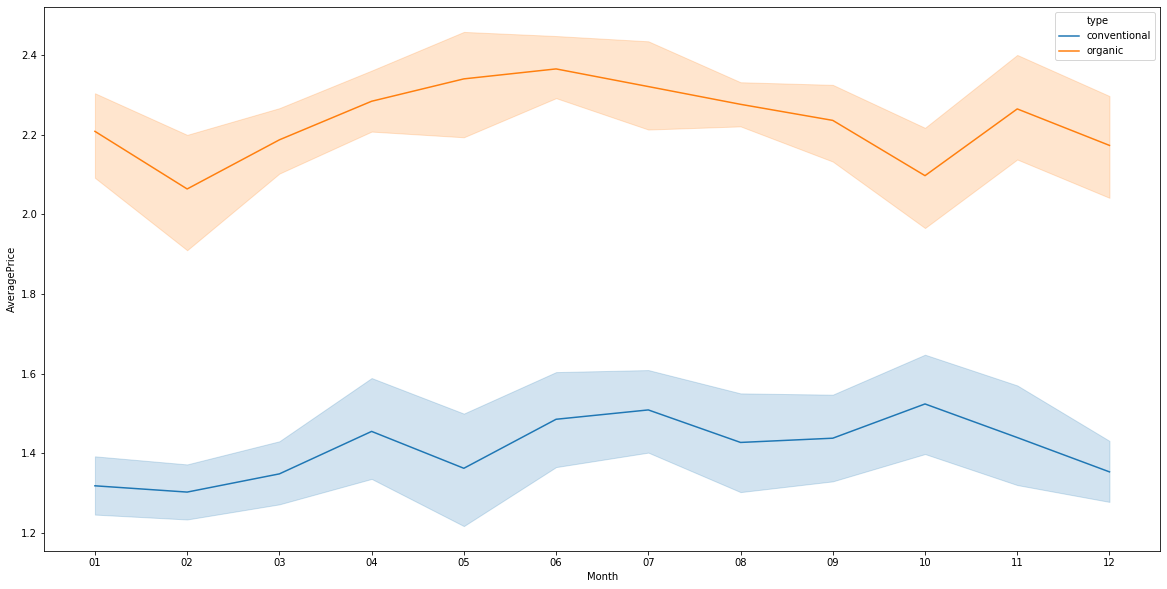

In [64]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=HarSpri_anaa)
plt.show()

In [65]:
#ax = sns.catplot(x="Month", y="AveragePrice", hue="type", 
 #           kind="box", data=HarSpri_anaa, height=8.5, linewidth=2.5, aspect=2.8,palette="Set2")
#sns.kdeplot(HarSpri_anaa.Month, HarSpri_anaa.AveragePrice, cmap="Blues", shade=True, bw=.15)


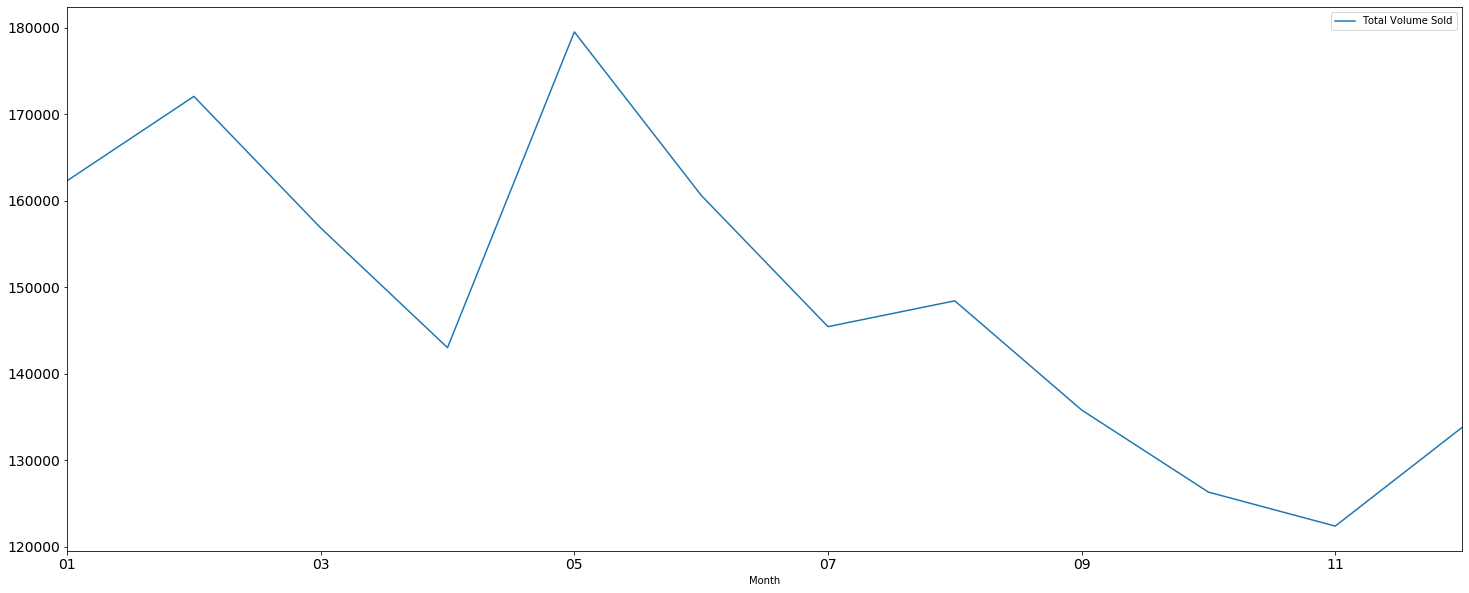

In [66]:
variant = HarSpri_anaa[['Total Volume Sold']].groupby(HarSpri_anaa.Month).mean()
variant.plot(kind='line', fontsize = 14, figsize=(25,10))

In [67]:
variant[variant['Total Volume Sold']==variant['Total Volume Sold'].min()]

,Total Volume Sold
Month,
11,122391.225769


In [68]:
variant[variant['Total Volume Sold']==variant['Total Volume Sold'].max()]

,Total Volume Sold
Month,
05,179512.726429


As we know that San Francisco also has highest mean average price after Hartford Springfield as we have observed in Heatmap so lets analyze the data for San Francisco

In [69]:
san_latitude=37.7749
san_longitude=-122.4194
san_map=folium.Map(location=[san_latitude,san_longitude],tiles='Stamen Terrain')
san_map

This is the location of San Francisco 

In [70]:
san=df[df["region"]=="SanFrancisco"]
san.drop(['Total Volume Sold','PLU_4225','PLU_4046','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year'],axis=1,inplace=True)
san.head()

C:\ANACONDA\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Date,AveragePrice,type,region
2184,2015-12-27,1.05,conventional,SanFrancisco
2185,2015-12-20,1.15,conventional,SanFrancisco
2186,2015-12-13,1.22,conventional,SanFrancisco
2187,2015-12-06,1.06,conventional,SanFrancisco
2188,2015-11-29,1.05,conventional,SanFrancisco


In [71]:
san1=san[san['type']=='organic']
san1.sort_values(by=['Date'],inplace=True)
san1.head()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,AveragePrice,type,region
11361,2015-01-04,1.18,organic,SanFrancisco
11360,2015-01-11,1.12,organic,SanFrancisco
11359,2015-01-18,1.27,organic,SanFrancisco
11358,2015-01-25,1.34,organic,SanFrancisco
11357,2015-02-01,1.06,organic,SanFrancisco


In [72]:
san1[san1['AveragePrice']==san1['AveragePrice'].min()]

,Date,AveragePrice,type,region
11357,2015-02-01,1.06,organic,SanFrancisco


In [73]:
san1[san1['AveragePrice']==san1['AveragePrice'].max()]

,Date,AveragePrice,type,region
14125,2016-10-30,3.25,organic,SanFrancisco


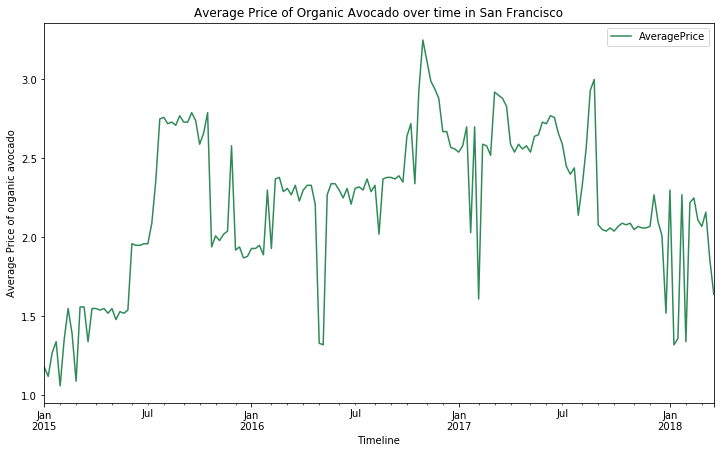

In [74]:
san1.plot(x='Date',y='AveragePrice',figsize=(12,7),color='seagreen')
plt.xlabel("Timeline")
plt.ylabel("Average Price of organic avocado")
plt.title("Average Price of Organic Avocado over time in San Francisco")
plt.legend()

In [75]:
san2=san[san['type']=='conventional']
san2.sort_values(by=['Date'],inplace=True)
san2.head()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,AveragePrice,type,region
2235,2015-01-04,0.99,conventional,SanFrancisco
2234,2015-01-11,1.03,conventional,SanFrancisco
2233,2015-01-18,1.22,conventional,SanFrancisco
2232,2015-01-25,1.21,conventional,SanFrancisco
2231,2015-02-01,0.91,conventional,SanFrancisco


In [76]:
san2[san2['AveragePrice']==san2['AveragePrice'].min()]

,Date,AveragePrice,type,region
7889,2017-02-05,0.84,conventional,SanFrancisco
8989,2018-02-04,0.84,conventional,SanFrancisco


In [77]:
san2[san2['AveragePrice']==san2['AveragePrice'].max()]

,Date,AveragePrice,type,region
5000,2016-10-30,2.2,conventional,SanFrancisco


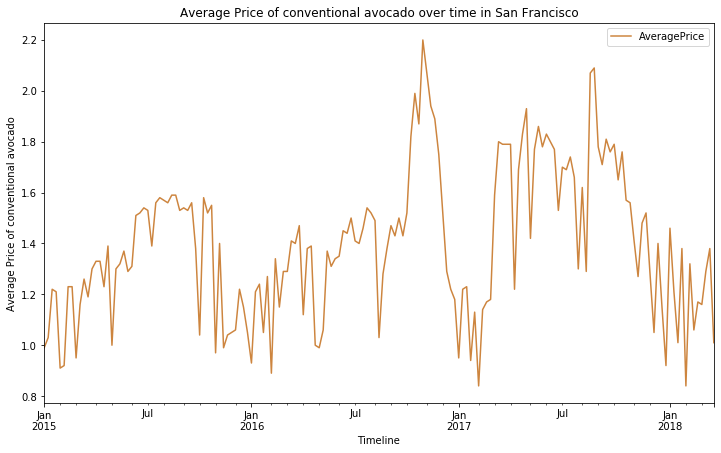

In [78]:
san2.plot(x='Date',y='AveragePrice',figsize=(12,7),color='peru')
plt.xlabel("Timeline")
plt.ylabel("Average Price of conventional avocado")
plt.title("Average Price of conventional avocado over time in San Francisco")
plt.legend()

In [79]:
san_ana=df[df["region"]=="SanFrancisco"]
san_ana.drop(['PLU_4225','PLU_4046','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year'],axis=1,inplace=True)
san_ana.head()

C:\ANACONDA\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Date,AveragePrice,Total Volume Sold,type,region
2184,2015-12-27,1.05,692206.40,conventional,SanFrancisco
2185,2015-12-20,1.15,637091.48,conventional,SanFrancisco
2186,2015-12-13,1.22,616016.46,conventional,SanFrancisco
2187,2015-12-06,1.06,694982.49,conventional,SanFrancisco
2188,2015-11-29,1.05,651638.60,conventional,SanFrancisco


In [80]:
san_ana1=san_ana.drop(['type','region','Date'],axis=1)

In [81]:
san_ana1.sort_values(by=['AveragePrice'],inplace=True)
san_ana1.head()

,AveragePrice,Total Volume Sold
8989,0.84,1706251.05
7889,0.84,1557975.05
5038,0.89,1355047.15
2231,0.91,1352027.64
2230,0.92,928836.58


Text(0.5, 1.0, 'Average Price vs Total Volume Sold in San Francisco')

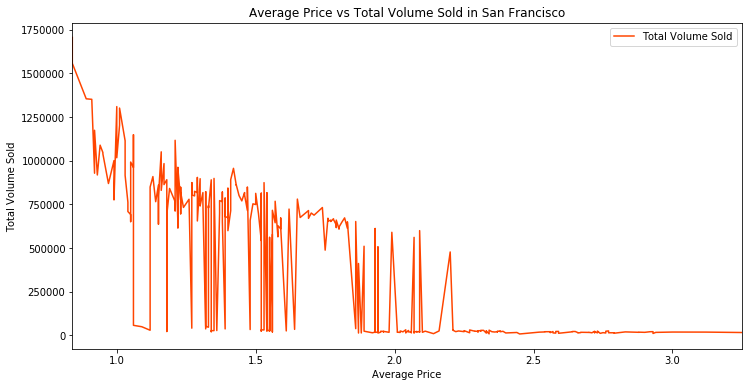

In [82]:
san_ana1.plot(x='AveragePrice',y='Total Volume Sold',kind='line',figsize=(12,6),color='orangered')
plt.xlabel('Average Price')
plt.ylabel('Total Volume Sold')
plt.title('Average Price vs Total Volume Sold in San Francisco')

In [83]:
san_mark=df[df["region"]=="SanFrancisco"]
san_mark.drop(['PLU_4225','AveragePrice','PLU_4046','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year'],axis=1,inplace=True)
san_mark.head()

C:\ANACONDA\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Date,Total Volume Sold,type,region
2184,2015-12-27,692206.40,conventional,SanFrancisco
2185,2015-12-20,637091.48,conventional,SanFrancisco
2186,2015-12-13,616016.46,conventional,SanFrancisco
2187,2015-12-06,694982.49,conventional,SanFrancisco
2188,2015-11-29,651638.60,conventional,SanFrancisco


In [84]:
san_mark1=san_mark[san_mark['type']=='organic']
san_mark1.sort_values(by=['Date'],inplace=True)
san_mark1.head()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Total Volume Sold,type,region
11361,2015-01-04,22630.58,organic,SanFrancisco
11360,2015-01-11,29676.78,organic,SanFrancisco
11359,2015-01-18,41482.48,organic,SanFrancisco
11358,2015-01-25,27146.81,organic,SanFrancisco
11357,2015-02-01,57802.02,organic,SanFrancisco


In [85]:
san_mark1[san_mark1['Total Volume Sold']==san_mark1['Total Volume Sold'].min()]

,Date,Total Volume Sold,type,region
16992,2017-07-09,8311.12,organic,SanFrancisco


In [86]:
san_mark1[san_mark1['Total Volume Sold']==san_mark1['Total Volume Sold'].max()]

,Date,Total Volume Sold,type,region
11357,2015-02-01,57802.02,organic,SanFrancisco


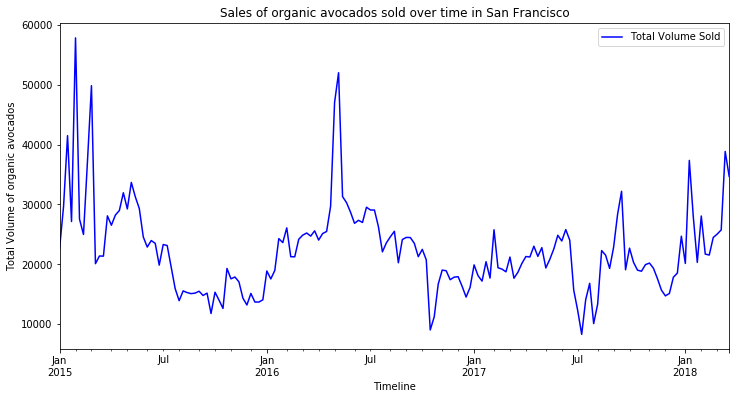

In [87]:
san_mark1.plot(x='Date',y='Total Volume Sold',kind='line',figsize=(12,6),color='blue')
plt.xlabel('Timeline')
plt.ylabel('Total Volume of organic avocados')
plt.title('Sales of organic avocados sold over time in San Francisco')
plt.legend()

In [88]:
san_mark2=san_mark[san_mark['type']=='conventional']
san_mark2.sort_values(by=['Date'],inplace=True)
san_mark2.head()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Total Volume Sold,type,region
2235,2015-01-04,907795.89,conventional,SanFrancisco
2234,2015-01-11,916450.76,conventional,SanFrancisco
2233,2015-01-18,753746.51,conventional,SanFrancisco
2232,2015-01-25,713523.24,conventional,SanFrancisco
2231,2015-02-01,1352027.64,conventional,SanFrancisco


In [89]:
san_mark2[san_mark2['Total Volume Sold']==san_mark2['Total Volume Sold'].min()]

,Date,Total Volume Sold,type,region
5001,2016-10-23,411873.66,conventional,SanFrancisco


In [90]:
san_mark2[san_mark2['Total Volume Sold']==san_mark2['Total Volume Sold'].max()]

,Date,Total Volume Sold,type,region
8989,2018-02-04,1706251.05,conventional,SanFrancisco


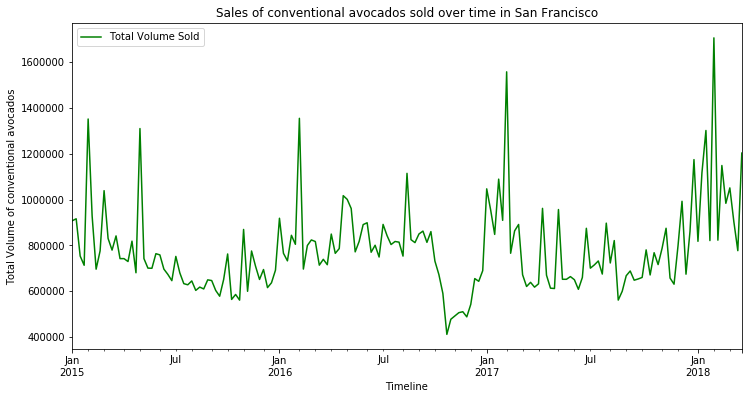

In [91]:
san_mark2.plot(x='Date',y='Total Volume Sold',kind='line',figsize=(12,6),color='green')
plt.xlabel('Timeline')
plt.ylabel('Total Volume of conventional avocados')
plt.title('Sales of conventional avocados sold over time in San Francisco')
plt.legend()

In [92]:
pearson_coef2 , p_value2 = stats.pearsonr(san_ana['AveragePrice'],san_ana['Total Volume Sold'])
print("The Pearson Correlation coefficient is",pearson_coef2," with a p-value of P : ",p_value2)

The Pearson Correlation coefficient is -0.7709556583470577  with a p-value of P :  8.23994209244763e-68


Since the p-value is < 0.001, the correlation between AveragePrice and Total Volume Sold is statistically significant,the coefficient of -0.770 shows that the relationship is negative and moderately strong.

In [93]:
SF=df1[df1["region"]=="SanFrancisco"]
SF.drop(['PLU_4225','PLU_4046','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)
SF.sort_values(by=['Date'],inplace=True)
SF.head()

C:\ANACONDA\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,AveragePrice,Total Volume Sold,type,year,region,Year,Month,Day
2235,2015-01-04,0.99,907795.89,conventional,2015,SanFrancisco,2015,01,04
11361,2015-01-04,1.18,22630.58,organic,2015,SanFrancisco,2015,01,04
2234,2015-01-11,1.03,916450.76,conventional,2015,SanFrancisco,2015,01,11
11360,2015-01-11,1.12,29676.78,organic,2015,SanFrancisco,2015,01,11
2233,2015-01-18,1.22,753746.51,conventional,2015,SanFrancisco,2015,01,18


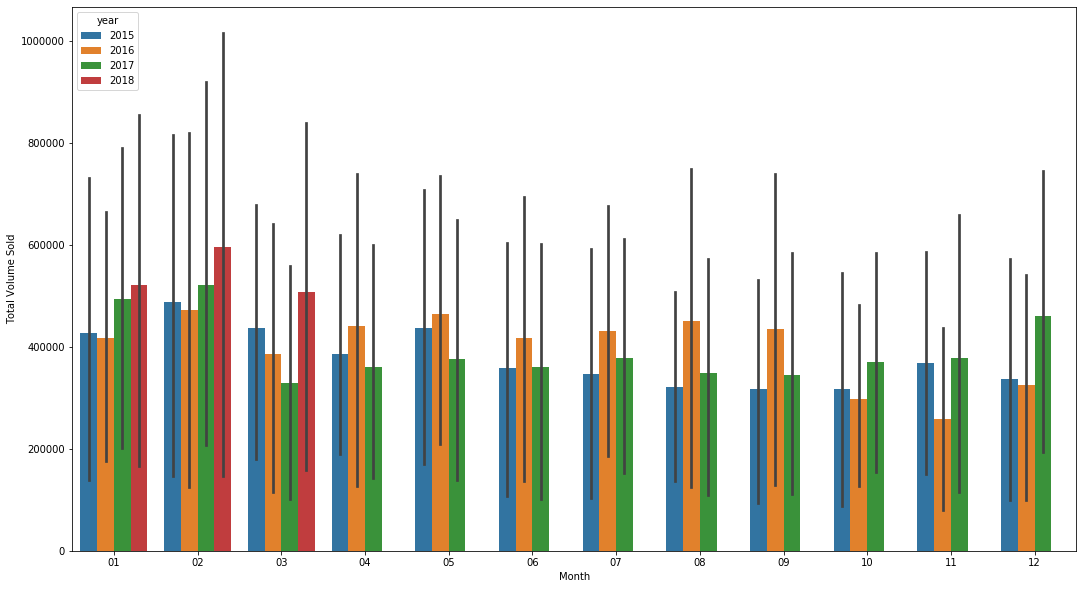

In [94]:
plt.figure(figsize=(18,10))
sns.barplot(x="Month", y="Total Volume Sold", hue='year',  data=SF)
plt.show()

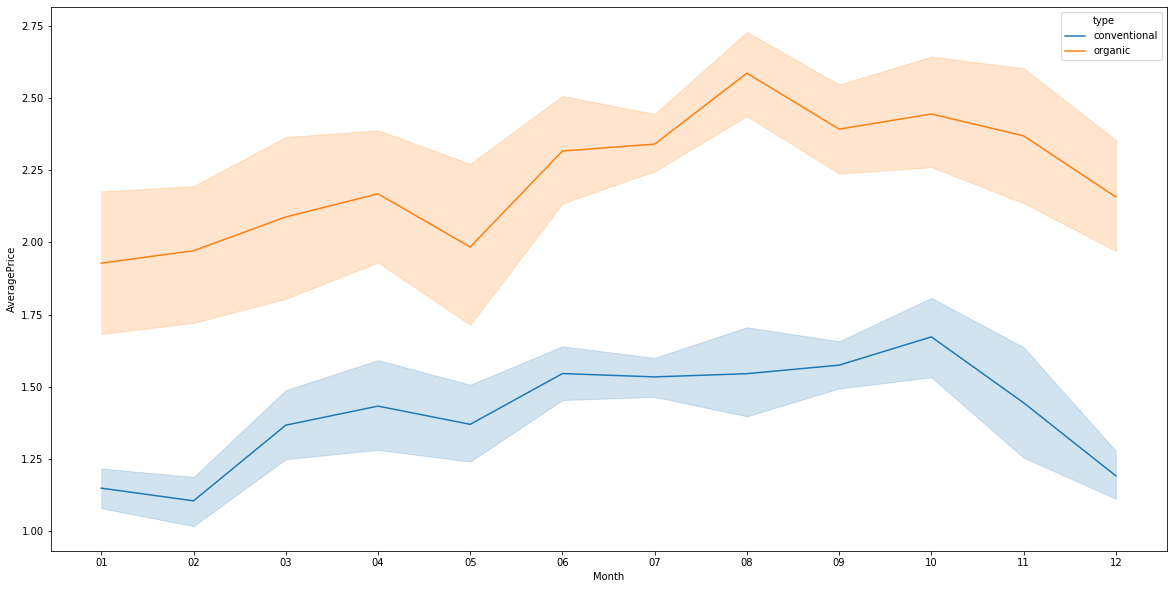

In [95]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=SF)
plt.show()

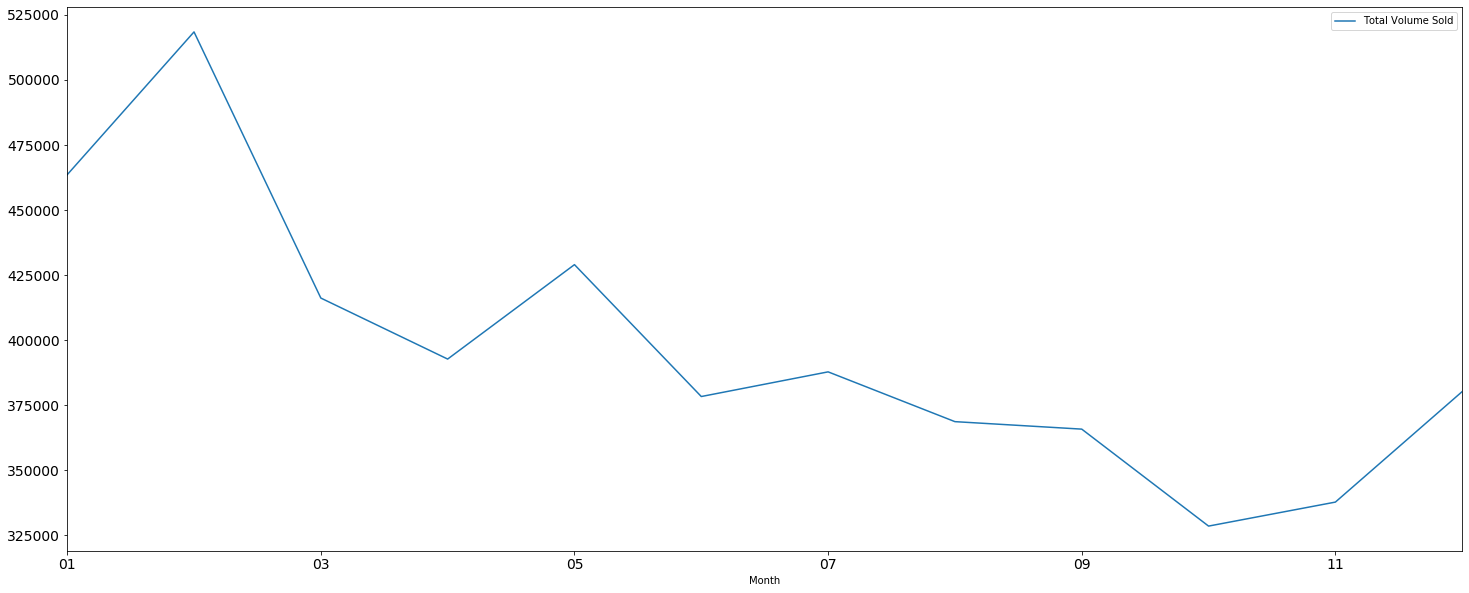

In [96]:
variant1= SF[['Total Volume Sold']].groupby(SF.Month).mean()
variant1.plot(kind='line', fontsize = 14, figsize=(25,10))

In [97]:
variant1[variant1['Total Volume Sold']==variant1['Total Volume Sold'].min()]

,Total Volume Sold
Month,
10,328570.412857


In [98]:
variant1[variant1['Total Volume Sold']==variant1['Total Volume Sold'].max()]

,Total Volume Sold
Month,
02,518460.020625


In [99]:
df_group1 = df_group_one.groupby(['region','type'],as_index=False).mean()

In [100]:
pie=df1.groupby(['region'],as_index=False).sum()

In [101]:
tr1=df[df['region']=="SanFrancisco"]

In [102]:
tr2=df[df['region']=='HartfordSpringfield']

In [103]:
pie=tr1.append(tr2)

In [104]:
pie.drop(['Total Volume Sold','PLU_4225','PLU_4046','PLU_4770','year','Date','AveragePrice','type','year'],axis=1,inplace=True)


In [105]:
pie=pie.groupby(['region'],as_index=False).sum()
pie.set_index('region',inplace=True)

In [106]:
pie

,Total Bags,Small Bags,Large Bags,XLarge Bags
region,,,,
HartfordSpringfield,11333012.63,10778560.68,476848.23,77601.72
SanFrancisco,14890924.97,14502351.14,176939.24,211634.59


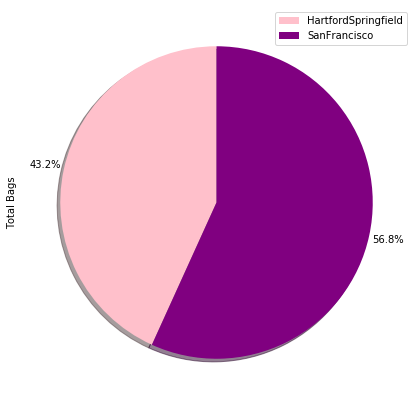

In [107]:
colors_list = ['pink','purple']
pie['Total Bags'].plot(kind='pie',figsize=(7, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,
                           colors=colors_list)
plt.legend(labels=pie.index, loc='upper right')


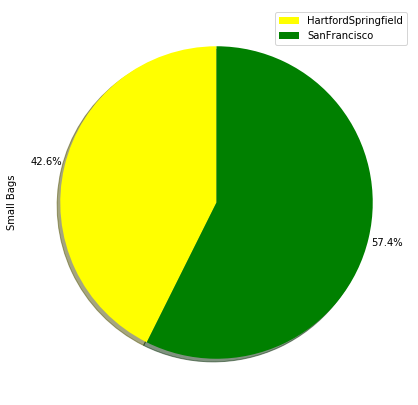

In [108]:
colors_list = ['yellow','green']
pie['Small Bags'].plot(kind='pie',figsize=(7, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,
                           colors=colors_list)
plt.legend(labels=pie.index, loc='upper right')


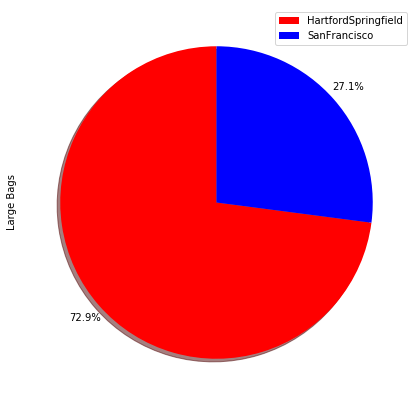

In [109]:
colors_list = ['red','blue']
pie['Large Bags'].plot(kind='pie',figsize=(7, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,
                           colors=colors_list)
plt.legend(labels=pie.index, loc='upper right')


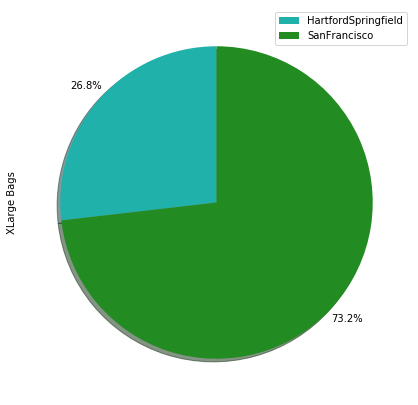

In [110]:
colors_list = ['lightseagreen','forestgreen']
pie['XLarge Bags'].plot(kind='pie',figsize=(7, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,
                           colors=colors_list)
plt.legend(labels=pie.index, loc='upper right')


# AVERAGE PRICE PREDICTION

In [111]:
HarSpri_df1=df[df["region"]=="HartfordSpringfield"]
HarSpri_df1.drop(['PLU_4225','PLU_4046','PLU_4770','Small Bags','Large Bags','Total Volume Sold','XLarge Bags','type','region','Total Bags','year'],axis=1,inplace=True)
#HarSpri_df1.set_index('Date',inplace=True)
HarSpri_df1.rename(columns={'Date':'ds','AveragePrice':'y'},inplace=True)
HarSpri_df1.sort_values(by=['ds'],inplace=True)
HarSpri_df1.head()

C:\ANACONDA\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\ANACONDA\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,ds,y
935,2015-01-04,1.06
10061,2015-01-04,2.32
934,2015-01-11,1.38
10060,2015-01-11,2.28
933,2015-01-18,1.39


In [112]:
def stat(dataframe):
    K=dataframe.values
    K1 , K2= K[0:169],K[169:]
    mm1 , mm2=K1.mean(),K2.mean()
    vr1 , vr2 = K1.var(),K2.var()
    print('mean1 = {} , mean2 = {}'.format(mm1,mm2))
    print('Difference in means is= ',mm2-mm1)
    print('variance1 = {} , variance2 = {}'.format(vr1,vr2))
    print('Difference in variance is= ',vr2-vr1)

In [113]:
stat(HarSpri_df1['y'])

mean1 = 1.7617751479289938 , mean2 = 1.8755029585798815
Difference in means is=  0.11372781065088766
variance1 = 0.268046552991842 , variance2 = 0.1640862854942054
Difference in variance is=  -0.1039602674976366


In [114]:
#AUGMENT DICKEY FULLER TEST
from statsmodels.tsa.stattools import adfuller

In [115]:
def ad(timeseries):
    print('RESULTS ARE FOLLOWING :')
    df_test = adfuller(timeseries,autolag='AIC')
    df_output=pd.Series(df_test[0:4],index=['Test Statistics','p-value','#Lags Used','Number Of Observation Used'])
    for key , val in df_test[4].items():
        df_output['Critical Value {}'.format(key)] = val
    print(df_output)   

In [116]:
ad(HarSpri_df1['y'])

RESULTS ARE FOLLOWING :
Test Statistics                -3.921123
p-value                         0.001885
#Lags Used                      6.000000
Number Of Observation Used    331.000000
Critical Value 1%              -3.450262
Critical Value 5%              -2.870312
Critical Value 10%             -2.571443
dtype: float64


In [117]:
from statsmodels.tsa.stattools import kpss

In [118]:
#KPSS TEST
def stats_test(timeseries):
    print('RESULTS ARE FOLLOWING')
    kpsstest=kpss(timeseries,regression='c')
    kpss_output=pd.Series(kpsstest[0:3],index=['Test Statistics','p-value','#Lags Used'])
    for key , val in kpsstest[3].items():
        kpss_output['Critical Value {}'.format(key)] = val
    print(kpss_output)    

In [119]:
stats_test(HarSpri_df1['y'])

RESULTS ARE FOLLOWING
Test Statistics         0.387845
p-value                 0.082394
#Lags Used             17.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


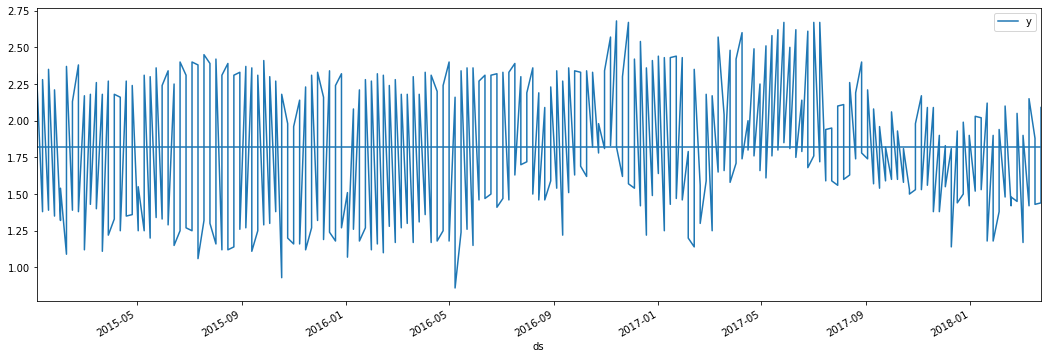

In [120]:
HarSpri_df1.plot(x='ds',y='y',figsize=(18,6))
plt.axhline(HarSpri_df1['y'].mean())
plt.show()

In [121]:
san_df1=df[df["region"]=="SanFrancisco"]
san_df1.drop(['Total Volume Sold','PLU_4225','PLU_4046','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year','region','type'],axis=1,inplace=True)
san_df1.rename(columns={'Date':'ds','AveragePrice':'y'},inplace=True)
san_df1.sort_values(by=['ds'],inplace=True)
san_df1.head()

C:\ANACONDA\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\ANACONDA\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,ds,y
2235,2015-01-04,0.99
11361,2015-01-04,1.18
2234,2015-01-11,1.03
11360,2015-01-11,1.12
2233,2015-01-18,1.22


In [122]:
stat(san_df1['y'])

mean1 = 1.6682840236686391 , mean2 = 1.9401183431952662
Difference in means is=  0.27183431952662707
variance1 = 0.26704498441931307 , variance2 = 0.3334059031546514
Difference in variance is=  0.06636091873533834


In [123]:
ad(san_df1['y'])

RESULTS ARE FOLLOWING :
Test Statistics                -3.283977
p-value                         0.015610
#Lags Used                      5.000000
Number Of Observation Used    332.000000
Critical Value 1%              -3.450201
Critical Value 5%              -2.870285
Critical Value 10%             -2.571429
dtype: float64


In [124]:
stats_test(san_df1['y'])

RESULTS ARE FOLLOWING
Test Statistics         0.515628
p-value                 0.038147
#Lags Used             17.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


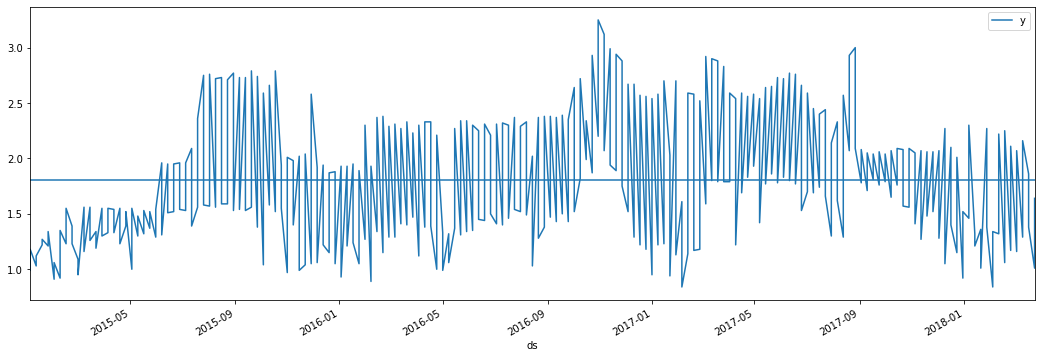

In [125]:
san_df1.plot(x='ds',y='y',figsize=(18,6))
plt.axhline(san_df1['y'].mean())
plt.show()

#### The data(for both the regions)  is sufficiently suitable for timeseries predictions

In [129]:
from fbprophet import Prophet

### Hartford Springfield 

In [131]:
ph1=Prophet()
ph1.fit(HarSpri_df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [132]:
future=ph1.make_future_dataframe(periods=720)

In [133]:
forecast = ph1.predict(future)

In [134]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.666020,1.064469,2.257989
1,2015-01-04,1.666020,1.054948,2.292949
2,2015-01-11,1.687221,1.094525,2.245756
3,2015-01-11,1.687221,1.094940,2.224354
4,2015-01-18,1.705275,1.084815,2.250251


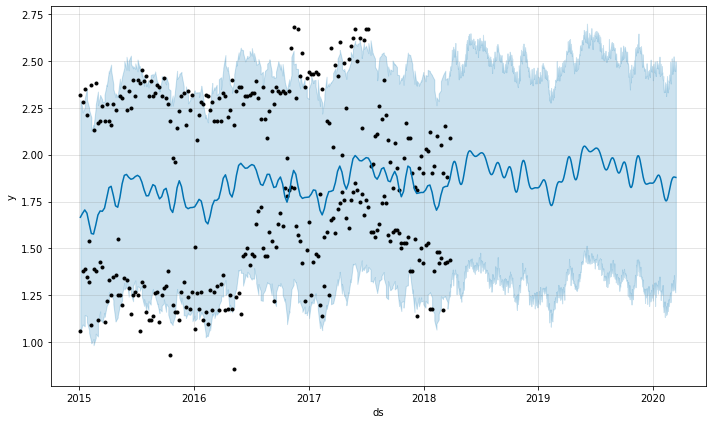

In [135]:
fig1 = ph1.plot(forecast)

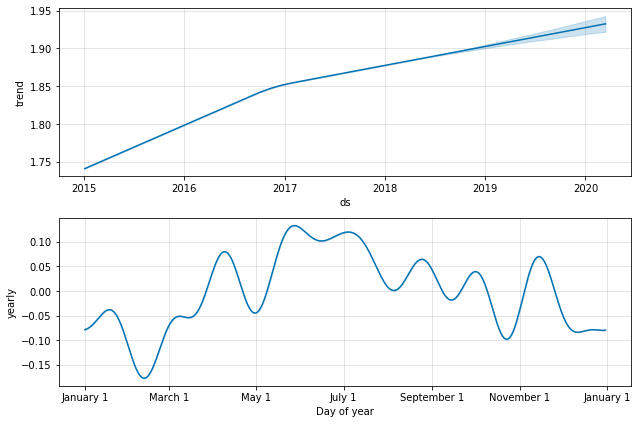

In [136]:
fig2 = ph1.plot_components(forecast)

## San Francisco 

In [137]:
ph2=Prophet()
ph2.fit(san_df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [138]:
future1=ph2.make_future_dataframe(periods=720)

In [139]:
forecast1 = ph2.predict(future1)

In [140]:
forecast1[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.259116,0.625462,1.918007
1,2015-01-04,1.259116,0.596351,1.921876
2,2015-01-11,1.255410,0.576766,1.945334
3,2015-01-11,1.255410,0.623413,1.919311
4,2015-01-18,1.245483,0.610003,1.878903


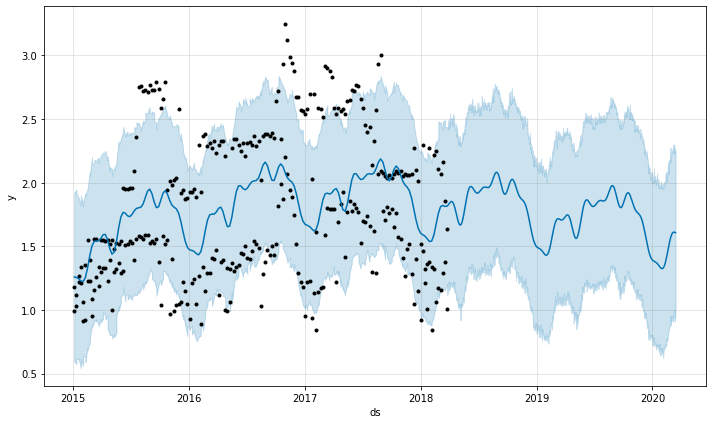

In [141]:
fig3 = ph2.plot(forecast1)

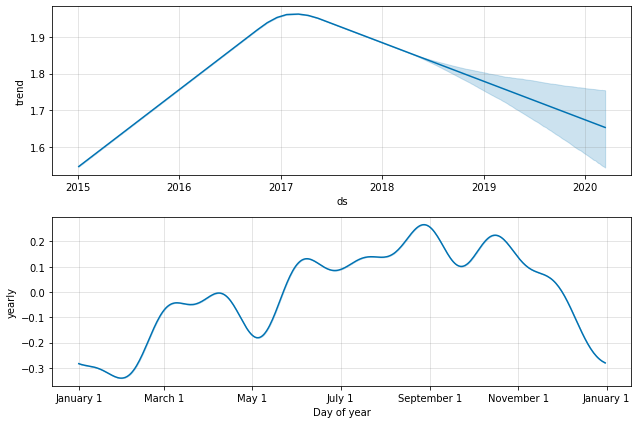

In [142]:
fig4 = ph2.plot_components(forecast1)

### THE END 